# **Tópicos Avançados em Inteligência Computacional 2 - Atividade 1**

- Docente: Ricardo Prudêncio

- Discente: Renata Kelly Marcelino dos Santos

- 26 de Agosto de 2024


### **SETTINGS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install numpy==1.26.0
!pip install pandas==2.1.0
!pip install pydotplus==2.0.2
!pip install scikit-learn==1.3.1
!pip install matplotlib==3.9.2
!pip install seaborn==0.13.2

In [ ]:
import numpy as np
import pandas as pd
import pydotplus
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import warnings
# Suprimindo os avisos específicos
warnings.filterwarnings("ignore", category=UserWarning)


### Dados: *Default of Credit Card Clients*

**Previsão da Probabilidade de Inadimplência de Clientes de Cartão de Crédito**

✨
1. **Descrição:** Esta base de dados contém informações sobre clientes de um banco em Taiwan, incluindo se eles falharam em pagar a fatura do cartão de crédito (default) no próximo mês.


2. **Objetivo:** Da perspectiva da gestão de risco, o resultado da precisão preditiva da probabilidade estimada de inadimplência será mais valioso do que o resultado binário da classificação - clientes confiáveis ​​ou não confiáveis. ***Mas para este trabalho será observada a curva ROC dos modelos para comparar qual modelo foi mais bem sucedido.***


3. **Características:** 30.000 observações, 24 atributos e 1 chave de identificação (ID)


4. **Dicionário Variáveis:**

- ID: Identificação de cada cliente

- LIMIT_BAL: Montante de crédito concedido em dólares NT (inclui crédito individual e crédito familiar/suplementar)

- SEX: Gênero (1=masculino, 2=feminino)

- EDUCATION: (1=pós-graduação, 2=graduação, 3=ensino médio, 4=outros, 5=desconhecido, 6=desconhecido)

- MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)

- AGE: Idade em anos

- PAY_0: Status de pagamento em setembro de 2005 (-1=pagamento em dia, 1=atraso de pagamento de um mês, 2=atraso de pagamento de dois meses, ... 8=atraso de pagamento de oito meses, 9=atraso de pagamento de nove meses ou mais)

- PAY_2: Status de pagamento em agosto de 2005 (escala igual à acima)

- PAY_3: Status de pagamento em julho de 2005 (escala igual à acima)

- PAY_4: Status de pagamento em junho de 2005 (escala igual à acima)

- PAY_5: Status de pagamento em maio de 2005 (escala igual à acima)

- PAY_6: Status de pagamento em abril de 2005 (escala igual à acima)

- BILL_AMT1: Montante da fatura em setembro de 2005 (dólar NT)

- BILL_AMT2: Montante da fatura em agosto de 2005 (dólar NT)

- BILL_AMT3: Montante da fatura em julho de 2005 (dólar NT)

- BILL_AMT4: Montante da fatura em junho de 2005 (dólar NT)

- BILL_AMT5: Montante da fatura em maio de 2005 (dólar NT)

- BILL_AMT6: Montante da fatura em abril de 2005 (dólar NT)

- PAY_AMT1: Montante do pagamento anterior em setembro de 2005 (dólar NT)

- PAY_AMT2: Montante do pagamento anterior em agosto de 2005 (dólar NT)

- PAY_AMT3: Montante do pagamento anterior em julho de 2005 (dólar NT)

- PAY_AMT4: Montante do pagamento anterior em junho de 2005 (dólar NT)

- PAY_AMT5: Montante do pagamento anterior em maio de 2005 (dólar NT)

- PAY_AMT6: Montante do pagamento anterior em abril de 2005 (dólar NT)

- default.payment.next.month: Inadimplência no pagamento (1=sim, 0=não)







## Reading a dataset

In [ ]:
# Lendo o dataset e observando o cabeçalho dos dados.
df = pd.read_csv('/content/drive/My Drive/datasets/data.csv')
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Observando os tipos das variáveis e dados nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [ ]:
# renomeando variável para manter o mesmo padrão de escrita das outras variáveis
df.rename(columns={'default payment next month': 'TARGET'}, inplace=True)

In [ ]:
# verificando se a variável foi renomeada.
df[['TARGET']].tail(5)

,TARGET
29995,0
29996,0
29997,1
29998,1
29999,1


## EDA

✨ Inicialmente vamos observar as variáveis numéricas discretas: `SEX`, `EDUCATION` e `MARRIAGE`.

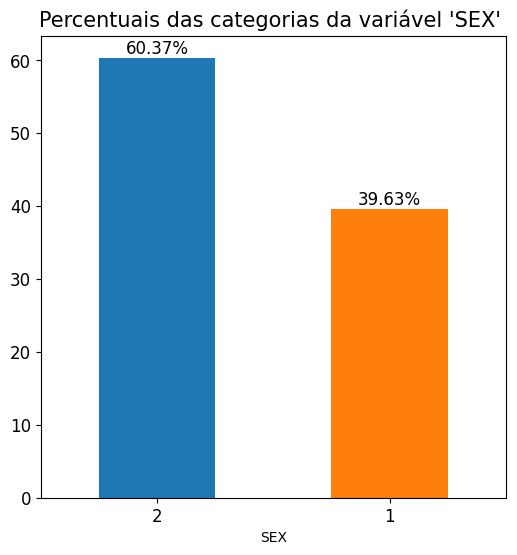

In [ ]:
def_cnt = df.SEX.value_counts(normalize=True) * 100
colors = ['#1f77b4', '#ff7f0e']  # Lista de cores
def_cnt.plot.bar(figsize=(6,6), color=colors)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentuais das categorias da variável 'SEX' ", fontsize=15)
for x, y in zip([0, 1], def_cnt):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()

✨ Podemos observar que a classe do sexo feminino (2) é a classe majoritária ou seja, é a classe que aparece com maior frequência no conjunto de dados.

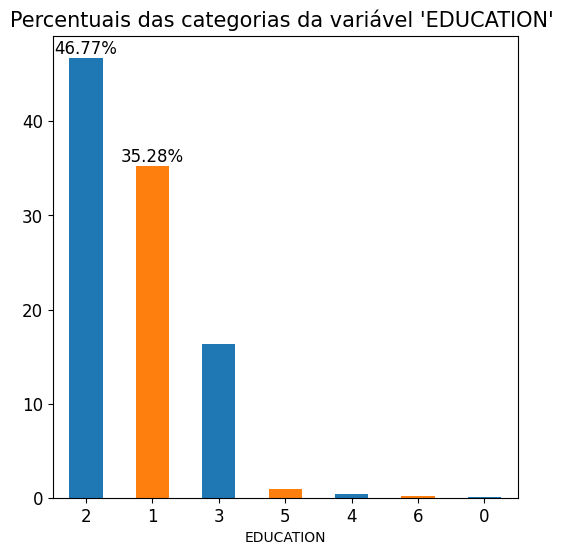

In [ ]:
def_cnt = df.EDUCATION.value_counts(normalize=True) * 100
colors = ['#1f77b4', '#ff7f0e']  # Lista de cores
def_cnt.plot.bar(figsize=(6,6), color=colors)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentuais das categorias da variável 'EDUCATION' ", fontsize=15)
for x, y in zip([0, 1], def_cnt):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()

✨ Na variável sobre educação, as classes que mais são representativas na base de dados são graduação, pós-graduação e ensino médio, respectivamente.

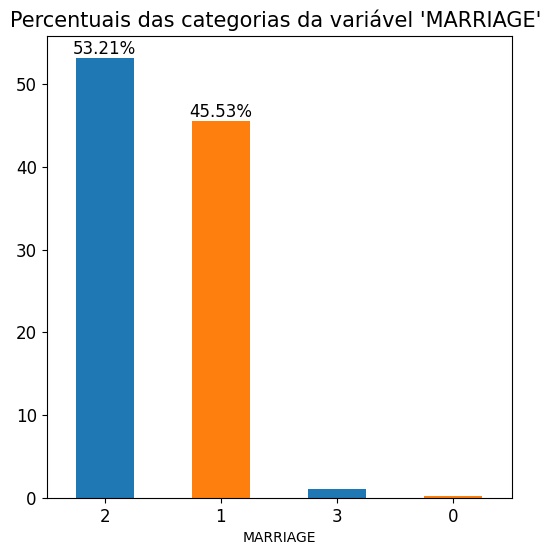

In [ ]:
def_cnt = df.MARRIAGE.value_counts(normalize=True) * 100
colors = ['#1f77b4', '#ff7f0e']  # Lista de cores
def_cnt.plot.bar(figsize=(6,6), color=colors)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentuais das categorias da variável 'MARRIAGE' ", fontsize=15)
for x, y in zip([0, 1], def_cnt):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()

✨ Para a variável sobre estado civil, solteiro é a classe majoritária.

✨ Agora analisando as variáveis numéricas contínuas: `LIMIT_BAL` e `AGE`.

<ipython-input-142-01d7b223e6b5>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


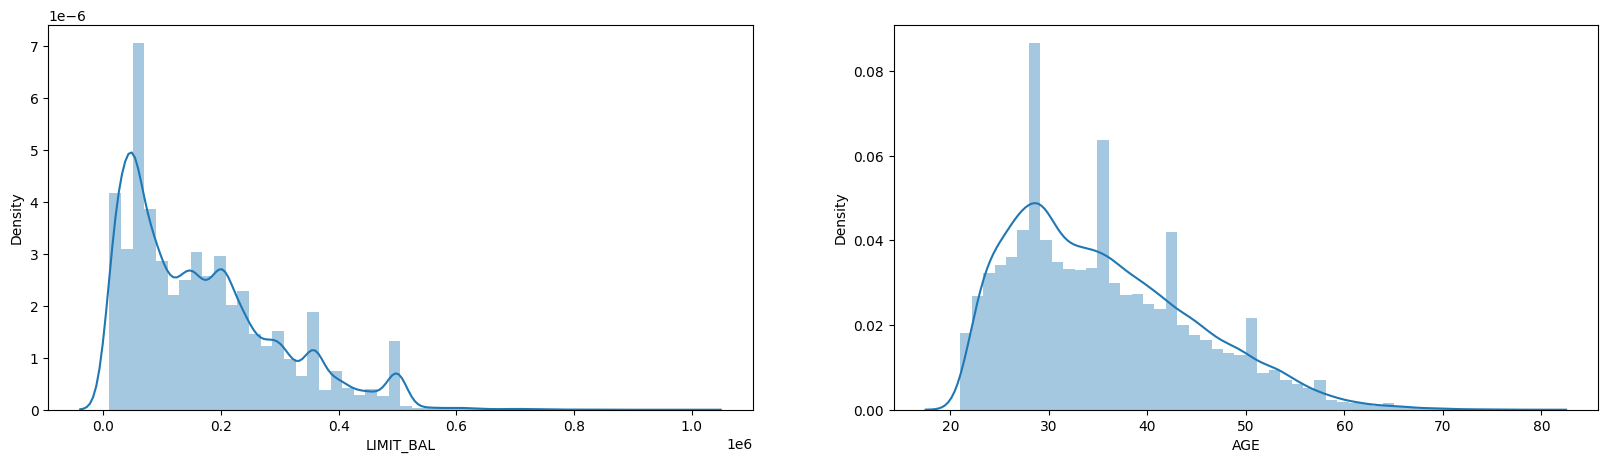

In [ ]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)
plt.subplot(122)
sns.distplot(df.AGE)
plt.show()

✨ Observa-se que `LIM_BAL` e `AGE` possuem distribuição assimétrica à direita/positiva. Ou seja, no sentido das variáveis existe uma grande concentração dos menores valores desses atributos.

✨ Agora, analisando as principais estatísticas das variáveis sobre o histórico de pagamento de fatura dos clientes:

- `PAY_`: Status de pagamento em determinado mês.

- `BILL_AMT_`: Montante da fatura em determinado mês. (dólar NT)

- `PAY_AMT_`: Montante do pagamento anterior em determinado mês. (dólar NT)


In [ ]:
# gerando as principais estatísticas das variáveis de históricos de pagamento e fatura.

df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0


✨ As variáveis sobre o status de pagamento são variáveis numéricas discretas, pois tem os seguintes preenchimentos: "-1=pagamento em dia, 1=atraso de pagamento de um mês, 2=atraso de pagamento de dois meses, ... 8=atraso de pagamento de oito meses, 9=atraso de pagamento de nove meses ou mais" O valor -2 não esteve rotulado na documentação dos dados, mas pelo sentido, deve indicar que também seja pagamento em dia.

✨ Com essa breve análise exploratória univariada, sendo observadas as principais estatísticas das variáveis, observa-se que a escala das variáveis são muito distintas sugerindo assim uma normalização dos dados. Muitos algoritmos de aprendizado de máquina são sensíveis à escala dos dados. Por exemplo, modelos baseados em distância como KNN.

✨ Abaixo a distribuição da variável resposta, que indica bons e maus clientes.

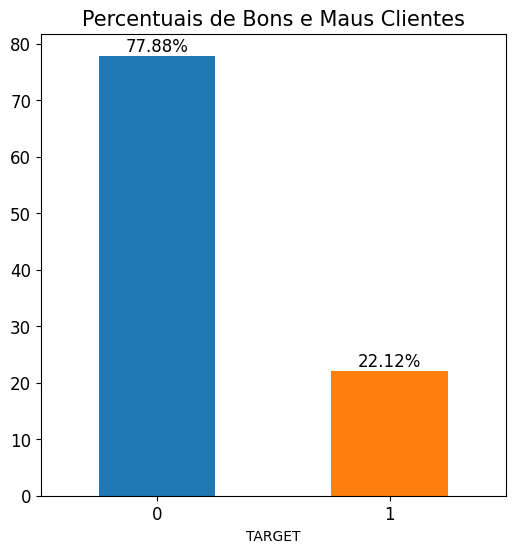

In [ ]:
def_cnt = df.TARGET.value_counts(normalize=True) * 100
colors = ['#1f77b4', '#ff7f0e']  # Lista de cores
def_cnt.plot.bar(figsize=(6,6), color=colors)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentuais de Bons e Maus Clientes", fontsize=15)
for x, y in zip([0, 1], def_cnt):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()

✨ Pode-se observar um desbalanceamento na variável resposta da base de dados, onde a classe `0` é majoritária.



**Análise de Correlação**

✨ Como todas as variáveis são numéricas, vamos avaliar a correlação de Pearson umas com as outras numa matriz de correlação.

In [ ]:
correlation_matrix = df.drop(columns=['ID']).corr(method='pearson')

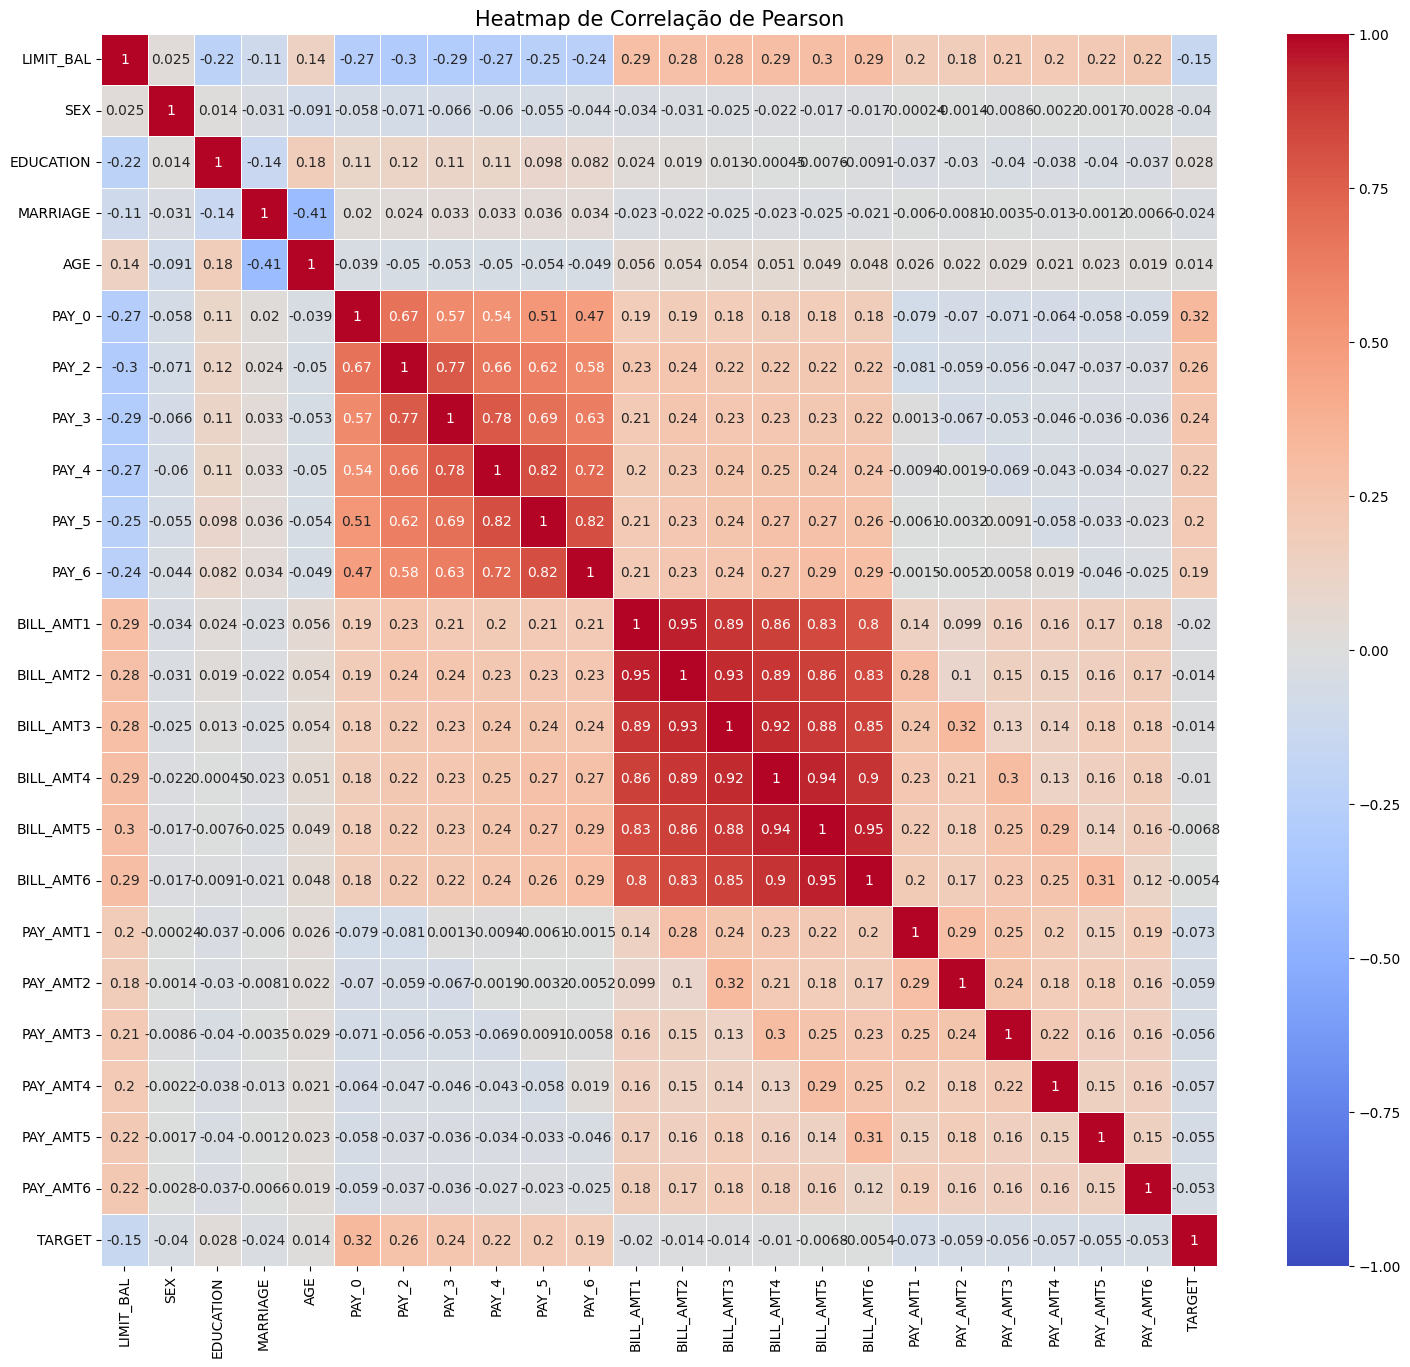

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap de Correlação de Pearson', fontsize=15)
plt.show()

✨ Nenhuma variável possui alta correlação com a variável resposta.  

As variáveis com alta correlação entre si são as variáveis sobre historico de pagamento e fatura dos clientes. A alta correlação vem devido como foram construídas e os seus conceitos.  Como por exemplo, `BILL_ATM1` e `BILL_ATM2` (0,95).

 A variável `PAY_0` é a que possui maior correlação com a variável resposta. Uma correlação positiva, mas é uma correlação baixa (0,32).

✨ Abaixo, podemos observar a distribuição da variável `PAY_0` em relação a média da variável `TARGET`. Dessa forma, podemos interpretar que para os menores valores da variável, a média da variável resposta é menor, o que faz sentido. Podemos chamar essa média de `taxa de inadimplência`.

In [ ]:
# média da variável resposta nas classes da variável PAY_0
df.groupby('PAY_0').TARGET.mean().reset_index().sort_values(by='PAY_0', ascending=True)

,PAY_0,TARGET
0,-2,0.132294
1,-1,0.167781
2,0,0.128113
3,1,0.339479
4,2,0.691414
5,3,0.757764
6,4,0.684211
7,5,0.500000
8,6,0.545455
9,7,0.777778


✨ Na visao de negócio, o interessante seria que essa variável tivesse uma distribuição crescente da média em relação às classes da variável PAY_0. Pois entende-se que quanto mais tempo de atraso no pagamento, maior a inadimplência.

Porém esse comportamento é devido a volumetria de bons e maus distribuídos nas classes. Poucos clientes tem atrasos muitos grandes (de 8, 9, 10 meses).

In [ ]:
# média da variável resposta nas classes da variável PAY_0
df.groupby('PAY_2').TARGET.mean().reset_index().sort_values(by='PAY_2', ascending=True)

,PAY_2,TARGET
0,-2,0.182708
1,-1,0.159669
2,0,0.159123
3,1,0.178571
4,2,0.556150
5,3,0.616564
6,4,0.505051
7,5,0.600000
8,6,0.750000
9,7,0.600000


In [ ]:
# volumetria de bons e maus distribuídos nas classes da variável PAY_0
pd.pivot_table(data=df,values = 'ID',
                              index = 'PAY_0',
                              columns = 'TARGET',
                              aggfunc = {'TARGET':'count'})

TARGET,0,1
PAY_0,,
-2,2394,365
-1,4732,954
0,12849,1888
1,2436,1252
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6


SAMPLING: **TRAINING AND TEST EXAMPLES**

In [ ]:
X = df.drop(columns=['TARGET', 'ID'])
Y = df['TARGET']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


## **LEARNING A DECISION TREE**

**Fitting a tree**

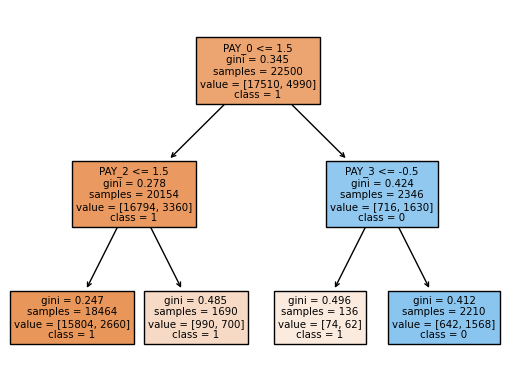

In [ ]:
dt = DecisionTreeClassifier(max_depth = 2) # # Árvore de decisão com no máximo dois níveis
dt.fit(X_train, Y_train)
tree.plot_tree(dt, feature_names = X.columns, class_names=['1', "0"],filled = True);

**VALIDATION THE DECISION TREE**

✨ Optei por observar também a Acurácia, pois é uma métrica direta e fácil de entender, frequentemente usada para avaliar o desempenho de modelos de classificação em problemas com classes balanceadas (que é o caso dos dados dessa análise).

Fórmula:
Acuracia=(TP+TN)/(TP+TN+FP+FN)

Onde:
TP = Verdadeiros Positivos

TN = Verdadeiros Negativos

FP = Falsos Positivos

FN = Falsos Negativos

In [ ]:
Xhat_dt = dt.predict(X_train)
Yhat_dt = dt.predict(X_test)

print("Acurácia dos dados de treino em decision tree : ", accuracy_score(Y_train,Xhat_dt))
print("Acurácia dos dados de teste em decision tree : ", accuracy_score(Y_test,Yhat_dt))

Xhat_dt = dt.predict_proba(X_train)[:, 1]
Yhat_dt = dt.predict_proba(X_test)[:, 1]

Acurácia dos dados de treino em decision tree :  0.8193777777777778
Acurácia dos dados de teste em decision tree :  0.8224


In [ ]:
#curva ROC e AUC

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Yhat_dt)
roc_auc_dt = roc_auc_score(Y_test, Yhat_dt)

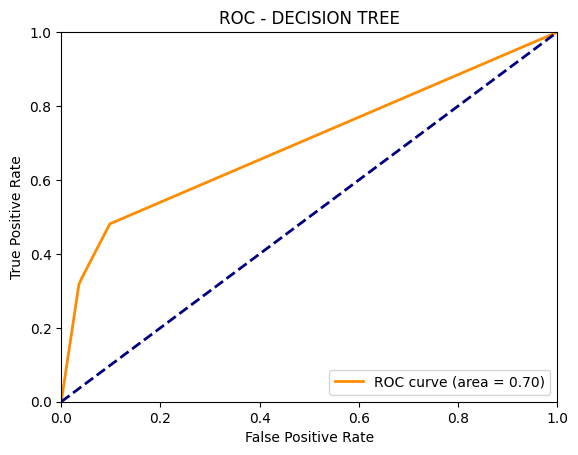

In [ ]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - DECISION TREE')
plt.legend(loc='lower right')
plt.show()

## **LEARNING A RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Xhat_rf = rf.predict(X_train)
Yhat_rf = rf.predict(X_test)

print("Acurácia dos dados de treino random forest: ", accuracy_score(Y_train,Xhat_rf))
print("Acurácia dos dados de teste random forest: ", accuracy_score(Y_test,Yhat_rf))

Xhat_rf = rf.predict_proba(X_train)[:, 1]
Yhat_rf = rf.predict_proba(X_test)[:, 1]

Acurácia dos dados de treino random forest:  0.9993777777777778
Acurácia dos dados de teste random forest:  0.8184


In [ ]:
#curva ROC e AUC

fpr_rf, tpr_rf, _ = roc_curve(Y_test, Yhat_rf)
roc_auc_rf = roc_auc_score(Y_test, Yhat_rf)

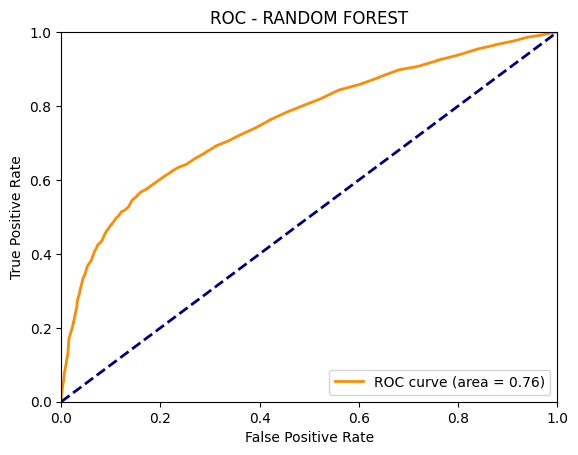

In [ ]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RANDOM FOREST')
plt.legend(loc='lower right')
plt.show()

## **LEARNING A LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Xhat_lr = lr.predict(X_train)
Yhat_lr = lr.predict(X_test)

print("Acurácia dos dados de treino logistic regression : ", accuracy_score(Y_train,Xhat_lr))
print("Acurácia dos dados de teste logistic regression : ", accuracy_score(Y_test,Yhat_lr))

Xhat_lr = lr.predict_proba(X_train)[:, 1]
Yhat_lr = lr.predict_proba(X_test)[:, 1]

Acurácia dos dados de treino logistic regression :  0.7780888888888889
Acurácia dos dados de teste logistic regression :  0.7805333333333333


In [ ]:
#curva ROC e AUC

fpr_lr, tpr_lr, _ = roc_curve(Y_test, Yhat_lr)
roc_auc_lr = roc_auc_score(Y_test, Yhat_lr)

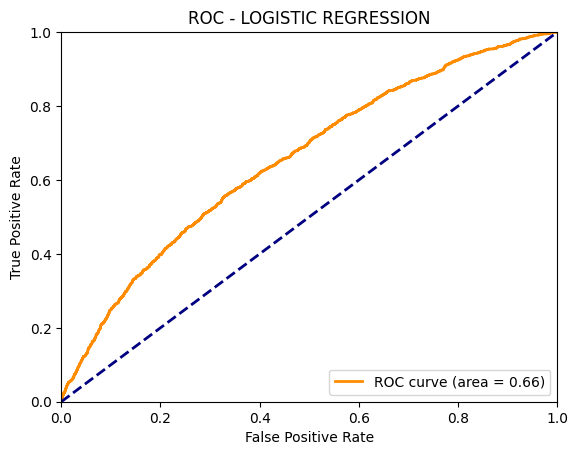

In [ ]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - LOGISTIC REGRESSION')
plt.legend(loc='lower right')
plt.show()

## **LEARNING A NAIVE BAYES**

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

Xhat_nb = nb.predict(X_train)
Yhat_nb = nb.predict(X_test)

print("Acurácia dos dados de treino naive bayes : ", accuracy_score(Y_train,Xhat_nb))
print("Acurácia dos dados de teste naive bayes : ", accuracy_score(Y_test,Yhat_nb))

Xhat_nb = nb.predict_proba(X_train)[:, 1]
Yhat_nb = nb.predict_proba(X_test)[:, 1]

Acurácia dos dados de treino naive bayes :  0.3994666666666667
Acurácia dos dados de teste naive bayes :  0.39693333333333336


In [ ]:
#curva ROC e AUC

fpr_nb, tpr_nb, _ = roc_curve(Y_test, Yhat_nb)
roc_auc_nb = roc_auc_score(Y_test, Yhat_nb)

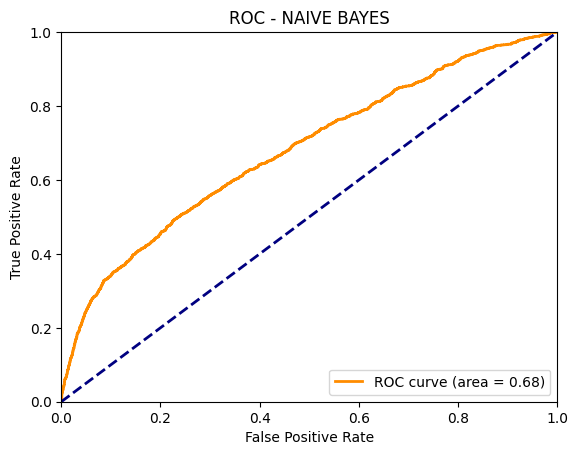

In [ ]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - NAIVE BAYES')
plt.legend(loc='lower right')
plt.show()

## **LEARNING A KNN**

✨ Normalizar os dados é importante para KNN, pois as distâncias entre os pontos são sensíveis às diferentes escalas das características. Sem normalização, características com valores maiores podem dominar a métrica de distância, afetando a precisão do modelo.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

Xhat_knn = knn.predict(X_train)
Yhat_knn = knn.predict(X_test)

print("Acurácia dos dados de treino  : ", accuracy_score(Y_train,Xhat_knn))
print("Acurácia dos dados de teste   : ", accuracy_score(Y_test,Yhat_knn))

Xhat_knn = knn.predict_proba(X_train)[:, 1]
Yhat_knn = knn.predict_proba(X_test)[:, 1]

Acurácia dos dados de treino  :  0.8409777777777778
Acurácia dos dados de teste   :  0.7922666666666667


In [ ]:
#curva ROC e AUC

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Yhat_knn)
roc_auc_knn = roc_auc_score(Y_test, Yhat_knn)

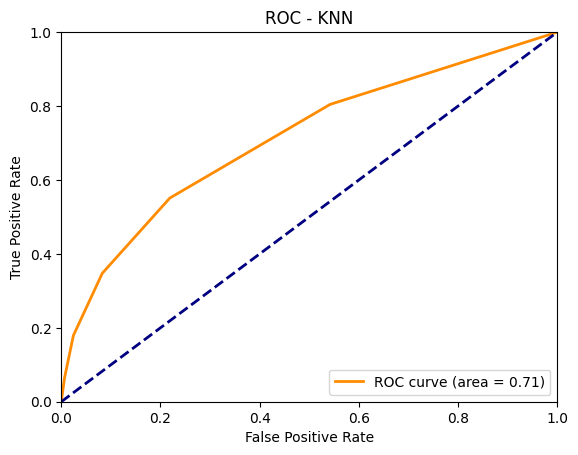

In [ ]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN')
plt.legend(loc='lower right')
plt.show()

## **EM RESUMO**

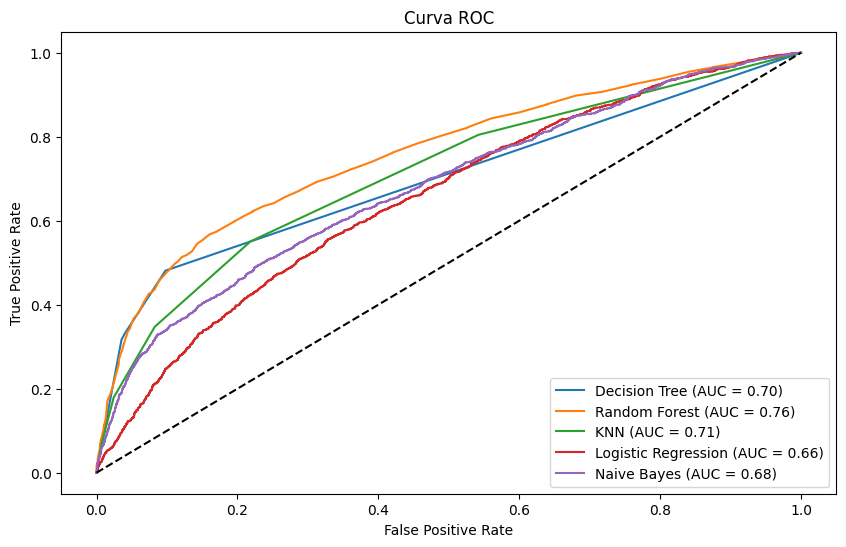

In [ ]:
# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

✨ Por fim, calculando a curva ROC dos modelos para comparar qual modelo foi mais bem sucedido para a base de crédito, o Random Forest foi o escolhido quando observada a métrica AUC = 0,76.

✨ Porém, quando observando outras métricas, como por exemplo a Acurácia, o Random Forest apresentou overfitting. Ou seja, ele não apresentou um resultado tão bom de acurácia na base de teste assim como na base de treino.

Acurácia dos dados de treino random forest: 99%

Acurácia dos dados de teste random forest:  81%

✨ Ainda sobre a curva ROC, os modelos com menor desempenho na curva roc foram a Regressão Logística, AUC = 65%, e o Naive Bayes, AUC = 68%. Ainda assim é um desempenho moderado.

O demais modelos, tiveram um  desempenho razoável quanto a curva roc (AUC >= 70%)

## Considerações finais

Os resultados dos modelos não foram satisfatórios, devido a falta de implemnetação de algumas técnicas para aumentar a robustez dos modelos. Tais como:

✨ Seleção de variáveis: Uma análise exploratória de dados mais aprofundada fazendo mais análises bivariadas, por exemplo, poderia nos dar mais *insights* de variáveis que poderiam ajudar o algoritmo a distinguir as classes da variável resposta. Utilizar também técnicas de seleção de variáveis, como análise de componentes principais e redução de dimensionalidade, poderiam também corroborar num melhor conjunto de váriáveis para prever a inadimplência dos clientes.


✨ Otimização de Parâmetros: Como não foram usados parâmetros específicos para estes dados, não conseguimos obter resultados tão satisfatórios. Talvez ajustando a profundidade máxima de cada árvore no Random Forest, o modelo não apresentasse tanto overfitting (quando observada a Acurácia). Árvores muito profundas podem aprender ruídos nos dados de treinamento, levando ao overfitting. Restringir a profundidade das árvores força o modelo a ser menos complexo, o que pode reduzir a sobreajuste aos dados de treinamento e melhorar a generalização.


✨ Criação de Novas variáveis: Combinar algumas variáveis já existentes na base de dados pode ajudar a no comportamento estranho de alguma variável. Como por exemplo, relacionar as variáveis

- `BILL_AMT_`: Montante da fatura em determinado mês. (dólar NT)

- `PAY_AMT_`: Montante do pagamento anterior em determinado mês. (dólar NT)

e criar uma variável que seja a razão de `PAY_AMT_` e `BILL_AMT_` e que nos refletisse o percentual de pagamento num determinado mês de um cliente.
